===========iteration:0===========
SGD:2.2884533941709373
Momentum:2.382993041113572
AdaGrad:2.0150739459146045
Adam:2.19919241070271
===========iteration:100===========
SGD:1.3505183410299555
Momentum:0.35638441014991995
AdaGrad:0.1766986005333736
Adam:0.21087528718253415
===========iteration:200===========
SGD:0.7071872548465853
Momentum:0.26466677259989735
AdaGrad:0.1378718486708656
Adam:0.2111435874938225
===========iteration:300===========
SGD:0.4587109737210894
Momentum:0.18423023888860163
AdaGrad:0.06360723179104093
Adam:0.17734438867312038
===========iteration:400===========
SGD:0.346479732298069
Momentum:0.14078072763004945
AdaGrad:0.046697845684265535
Adam:0.059311697189052444
===========iteration:500===========
SGD:0.301207217727604
Momentum:0.11625386151451109
AdaGrad:0.05884391554483843
Adam:0.10253382962257143
===========iteration:600===========
SGD:0.2502013649838807
Momentum:0.11515523001568784
AdaGrad:0.07540851723611164
Adam:0.09706063407063108
===========iteration:700

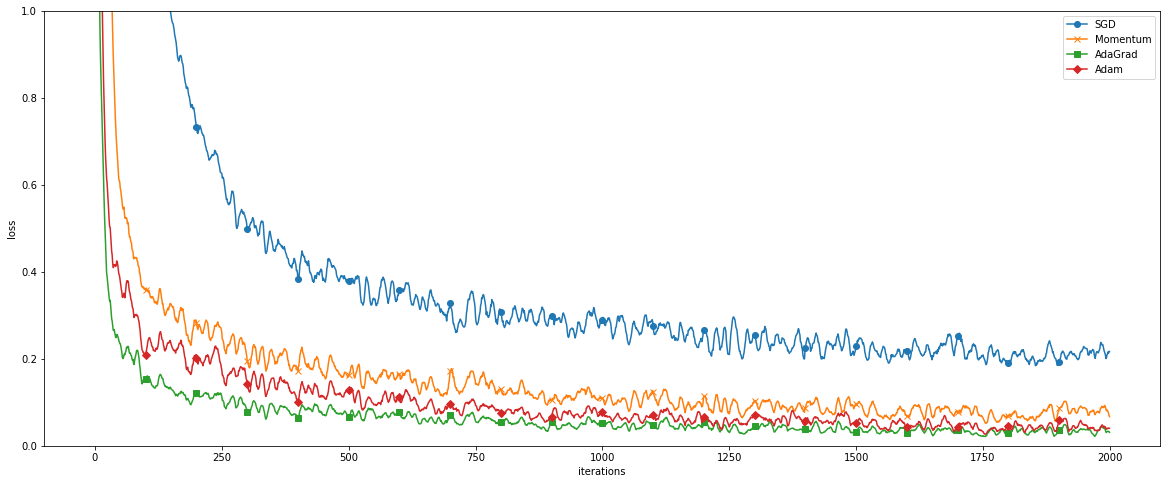

In [2]:
from dataset.mnist import load_mnist
# dataset 폴더 내 mnist.py에서 load_mnist import하여 데이터 다운 
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *
# common 폴더 내에 있는 util.py에서 smooth_curve, multi_layer_net.py에서 MultiLayerNet import
import matplotlib.pyplot as plt

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
plt.figure(figsize=(20,8))
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()